In [ ]:
import pandas as pd
import numpy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')
df

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0            0     0.603610      -7.636942      0.023500         0.000005   
1            1     0.639451     -16.267598      0.071520         0.444929   
2            2     0.514538     -15.953575      0.110715         0.173699   
3            3     0.734463      -1.357000      0.052965         0.001651   
4            4     0.532968     -13.056437      0.023500         0.068687   
...        ...          ...            ...           ...              ...   
524159  524159     0.796831     -13.405645      0.023500         0.504738   
524160  524160     0.975000     -12.132914      0.077379         0.069462   
524161  524161     0.542958      -1.357000      0.071390         0.168978   
524162  524162     0.637192      -7.411331      0.113086         0.000005   
524163  524163     0.776515      -5.484091      0.023500         0.271189   

        InstrumentalScore  LivePerformanceLikelihood  MoodScore  \
0                0.000001                   0.051385   0.409866   
1                0.349414                   0.170522   0.651010   
2                0.453814                   0.029576   0.423865   
3                0.159717                   0.086366   0.278745   
4                0.000001                   0.331345   0.477769   
...                   ...                        ...        ...   
524159           0.000001                   0.191414   0.668079   
524160           0.262320                   0.124818   0.288946   
524161           0.000001                   0.313912   0.586868   
524162           0.061946                   0.287963   0.368891   
524163           0.067338                   0.339319   0.793487   

        TrackDurationMs    Energy  BeatsPerMinute  
0           290715.6450  0.826267       147.53020  
1           164519.5174  0.145400       136.15963  
2           174495.5667  0.624667        55.31989  
3           225567.4651  0.487467       147.91212  
4           213960.6789  0.947333        89.58511  
...                 ...       ...             ...  
524159      135528.3189  0.004400       117.83118  
524160      240709.3918  0.447067        89.02681  
524161      344858.2321  0.718800        90.75885  
524162      322710.3187  0.944267       140.63235  
524163      313870.0566  0.223933        77.45960  

[524164 rows x 11 columns]

In [ ]:
df1_test = pd.read_csv('/content/test.csv')
df1_test

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0       524164     0.410013     -16.794967      0.023500         0.232910   
1       524165     0.463071      -1.357000      0.141818         0.057725   
2       524166     0.686569      -3.368928      0.167851         0.287823   
3       524167     0.885793      -5.598049      0.118488         0.000005   
4       524168     0.637391      -7.068160      0.126099         0.539073   
...        ...          ...            ...           ...              ...   
174717  698881     0.332976      -9.654381      0.155402         0.143983   
174718  698882     0.828106     -11.143536      0.121822         0.451146   
174719  698883     0.569334      -4.253765      0.137968         0.246896   
174720  698884     0.764595     -11.088025      0.055225         0.430128   
174721  698885     0.823192     -16.435543      0.023500         0.346906   

        InstrumentalScore  LivePerformanceLikelihood  MoodScore  \
0                0.012689                   0.271585   0.664321   
1                0.257942                   0.097624   0.829552   
2                0.210915                   0.325909   0.304978   
3                0.376906                   0.134435   0.487740   
4                0.068950                   0.024300   0.591248   
...                   ...                        ...        ...   
174717           0.351255                   0.307580   0.679634   
174718           0.096678                   0.140123   0.274977   
174719           0.079425                   0.102919   0.569331   
174720           0.006836                   0.105584   0.653928   
174721           0.295836                   0.167825   0.391377   

        TrackDurationMs    Energy  
0           302901.5498  0.424867  
1           221995.6643  0.846000  
2           357724.0127  0.134067  
3           271790.3989  0.316467  
4           277728.5383  0.481067  
...                 ...       ...  
174717      255610.4189  0.427533  
174718      241204.9403  0.098333  
174719      127422.2955  0.193200  
174720      171586.5838  0.067467  
174721      334815.4486  0.436867  

[174722 rows x 10 columns]

In [ ]:
df.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  524164.000000  524164.000000  524164.000000  524164.000000   
mean   262081.500000       0.632843      -8.379014       0.074443   
std    151313.257586       0.156899       4.616221       0.049939   
min         0.000000       0.076900     -27.509725       0.023500   
25%    131040.750000       0.515850     -11.551933       0.023500   
50%    262081.500000       0.634686      -8.252499       0.066425   
75%    393122.250000       0.739179      -4.912298       0.107343   
max    524163.000000       0.975000      -1.357000       0.256401   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    524164.000000      524164.000000              524164.000000   
mean          0.262913           0.117690                   0.178398   
std           0.223120           0.131845                   0.118186   
min           0.000005           0.000001                   0.024300   
25%           0.069413           0.000001                   0.077637   
50%           0.242502           0.074247                   0.166327   
75%           0.396957           0.204065                   0.268946   
max           0.995000           0.869258                   0.599924   

           MoodScore  TrackDurationMs         Energy  BeatsPerMinute  
count  524164.000000    524164.000000  524164.000000   524164.000000  
mean        0.555843    241903.692949       0.500923      119.034899  
std         0.225480     59326.601501       0.289952       26.468077  
min         0.025600     63973.000000       0.000067       46.718000  
25%         0.403921    207099.876625       0.254933      101.070410  
50%         0.564817    243684.058150       0.511800      118.747660  
75%         0.716633    281851.658500       0.746000      136.686590  
max         0.978000    464723.228100       1.000000      206.037000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [ ]:
df1= df.drop(['id'], axis = 1)
df1

RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0          0.603610      -7.636942      0.023500         0.000005   
1          0.639451     -16.267598      0.071520         0.444929   
2          0.514538     -15.953575      0.110715         0.173699   
3          0.734463      -1.357000      0.052965         0.001651   
4          0.532968     -13.056437      0.023500         0.068687   
...             ...            ...           ...              ...   
524159     0.796831     -13.405645      0.023500         0.504738   
524160     0.975000     -12.132914      0.077379         0.069462   
524161     0.542958      -1.357000      0.071390         0.168978   
524162     0.637192      -7.411331      0.113086         0.000005   
524163     0.776515      -5.484091      0.023500         0.271189   

        InstrumentalScore  LivePerformanceLikelihood  MoodScore  \
0                0.000001                   0.051385   0.409866   
1                0.349414                   0.170522   0.651010   
2                0.453814                   0.029576   0.423865   
3                0.159717                   0.086366   0.278745   
4                0.000001                   0.331345   0.477769   
...                   ...                        ...        ...   
524159           0.000001                   0.191414   0.668079   
524160           0.262320                   0.124818   0.288946   
524161           0.000001                   0.313912   0.586868   
524162           0.061946                   0.287963   0.368891   
524163           0.067338                   0.339319   0.793487   

        TrackDurationMs    Energy  BeatsPerMinute  
0           290715.6450  0.826267       147.53020  
1           164519.5174  0.145400       136.15963  
2           174495.5667  0.624667        55.31989  
3           225567.4651  0.487467       147.91212  
4           213960.6789  0.947333        89.58511  
...                 ...       ...             ...  
524159      135528.3189  0.004400       117.83118  
524160      240709.3918  0.447067        89.02681  
524161      344858.2321  0.718800        90.75885  
524162      322710.3187  0.944267       140.63235  
524163      313870.0566  0.223933        77.45960  

[524164 rows x 10 columns]

In [ ]:
df1.isnull().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.columns

Index(['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [ ]:
df1.head()

RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0     0.603610      -7.636942      0.023500         0.000005   
1     0.639451     -16.267598      0.071520         0.444929   
2     0.514538     -15.953575      0.110715         0.173699   
3     0.734463      -1.357000      0.052965         0.001651   
4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [ ]:
df1.tail()

RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
524159     0.796831     -13.405645      0.023500         0.504738   
524160     0.975000     -12.132914      0.077379         0.069462   
524161     0.542958      -1.357000      0.071390         0.168978   
524162     0.637192      -7.411331      0.113086         0.000005   
524163     0.776515      -5.484091      0.023500         0.271189   

        InstrumentalScore  LivePerformanceLikelihood  MoodScore  \
524159           0.000001                   0.191414   0.668079   
524160           0.262320                   0.124818   0.288946   
524161           0.000001                   0.313912   0.586868   
524162           0.061946                   0.287963   0.368891   
524163           0.067338                   0.339319   0.793487   

        TrackDurationMs    Energy  BeatsPerMinute  
524159      135528.3189  0.004400       117.83118  
524160      240709.3918  0.447067        89.02681  
524161      344858.2321  0.718800        90.75885  
524162      322710.3187  0.944267       140.63235  
524163      313870.0566  0.223933        77.45960

<Axes: >

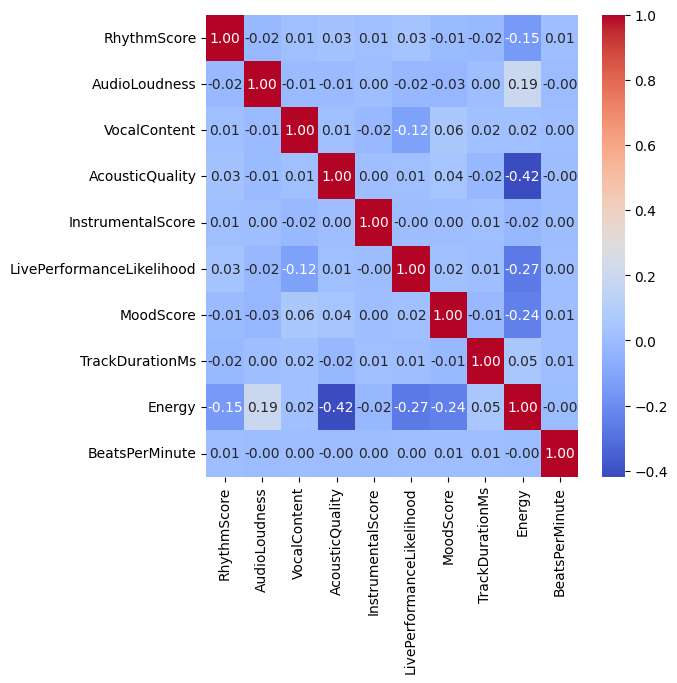

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")

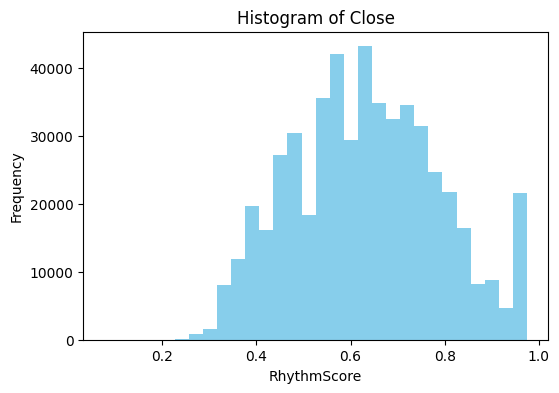

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df1['RhythmScore'], bins=30, color='skyblue')
plt.title('Histogram of Close')
plt.xlabel('RhythmScore')
plt.ylabel('Frequency')
plt.show()

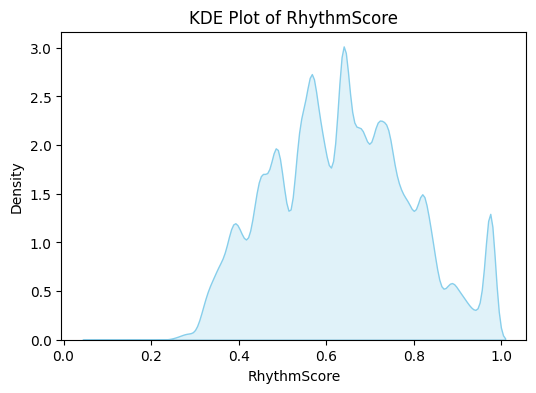

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df1['RhythmScore'], fill=True, color='skyblue')
plt.title('KDE Plot of RhythmScore')
plt.xlabel('RhythmScore')
plt.ylabel('Density')
plt.show()

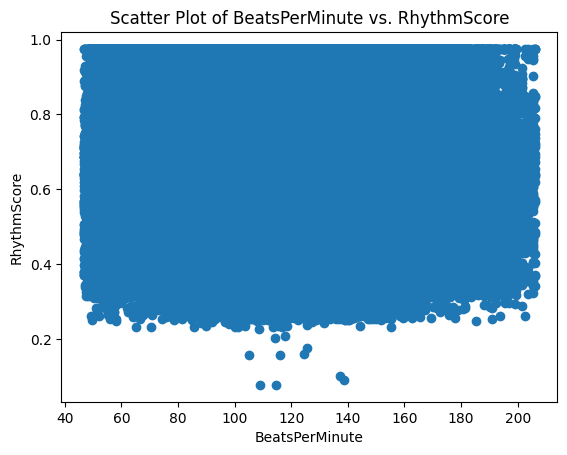

In [ ]:
plt.scatter(df1['BeatsPerMinute'], df1['RhythmScore'])
plt.title('Scatter Plot of BeatsPerMinute vs. RhythmScore')
plt.xlabel('BeatsPerMinute')
plt.ylabel('RhythmScore')
plt.show()

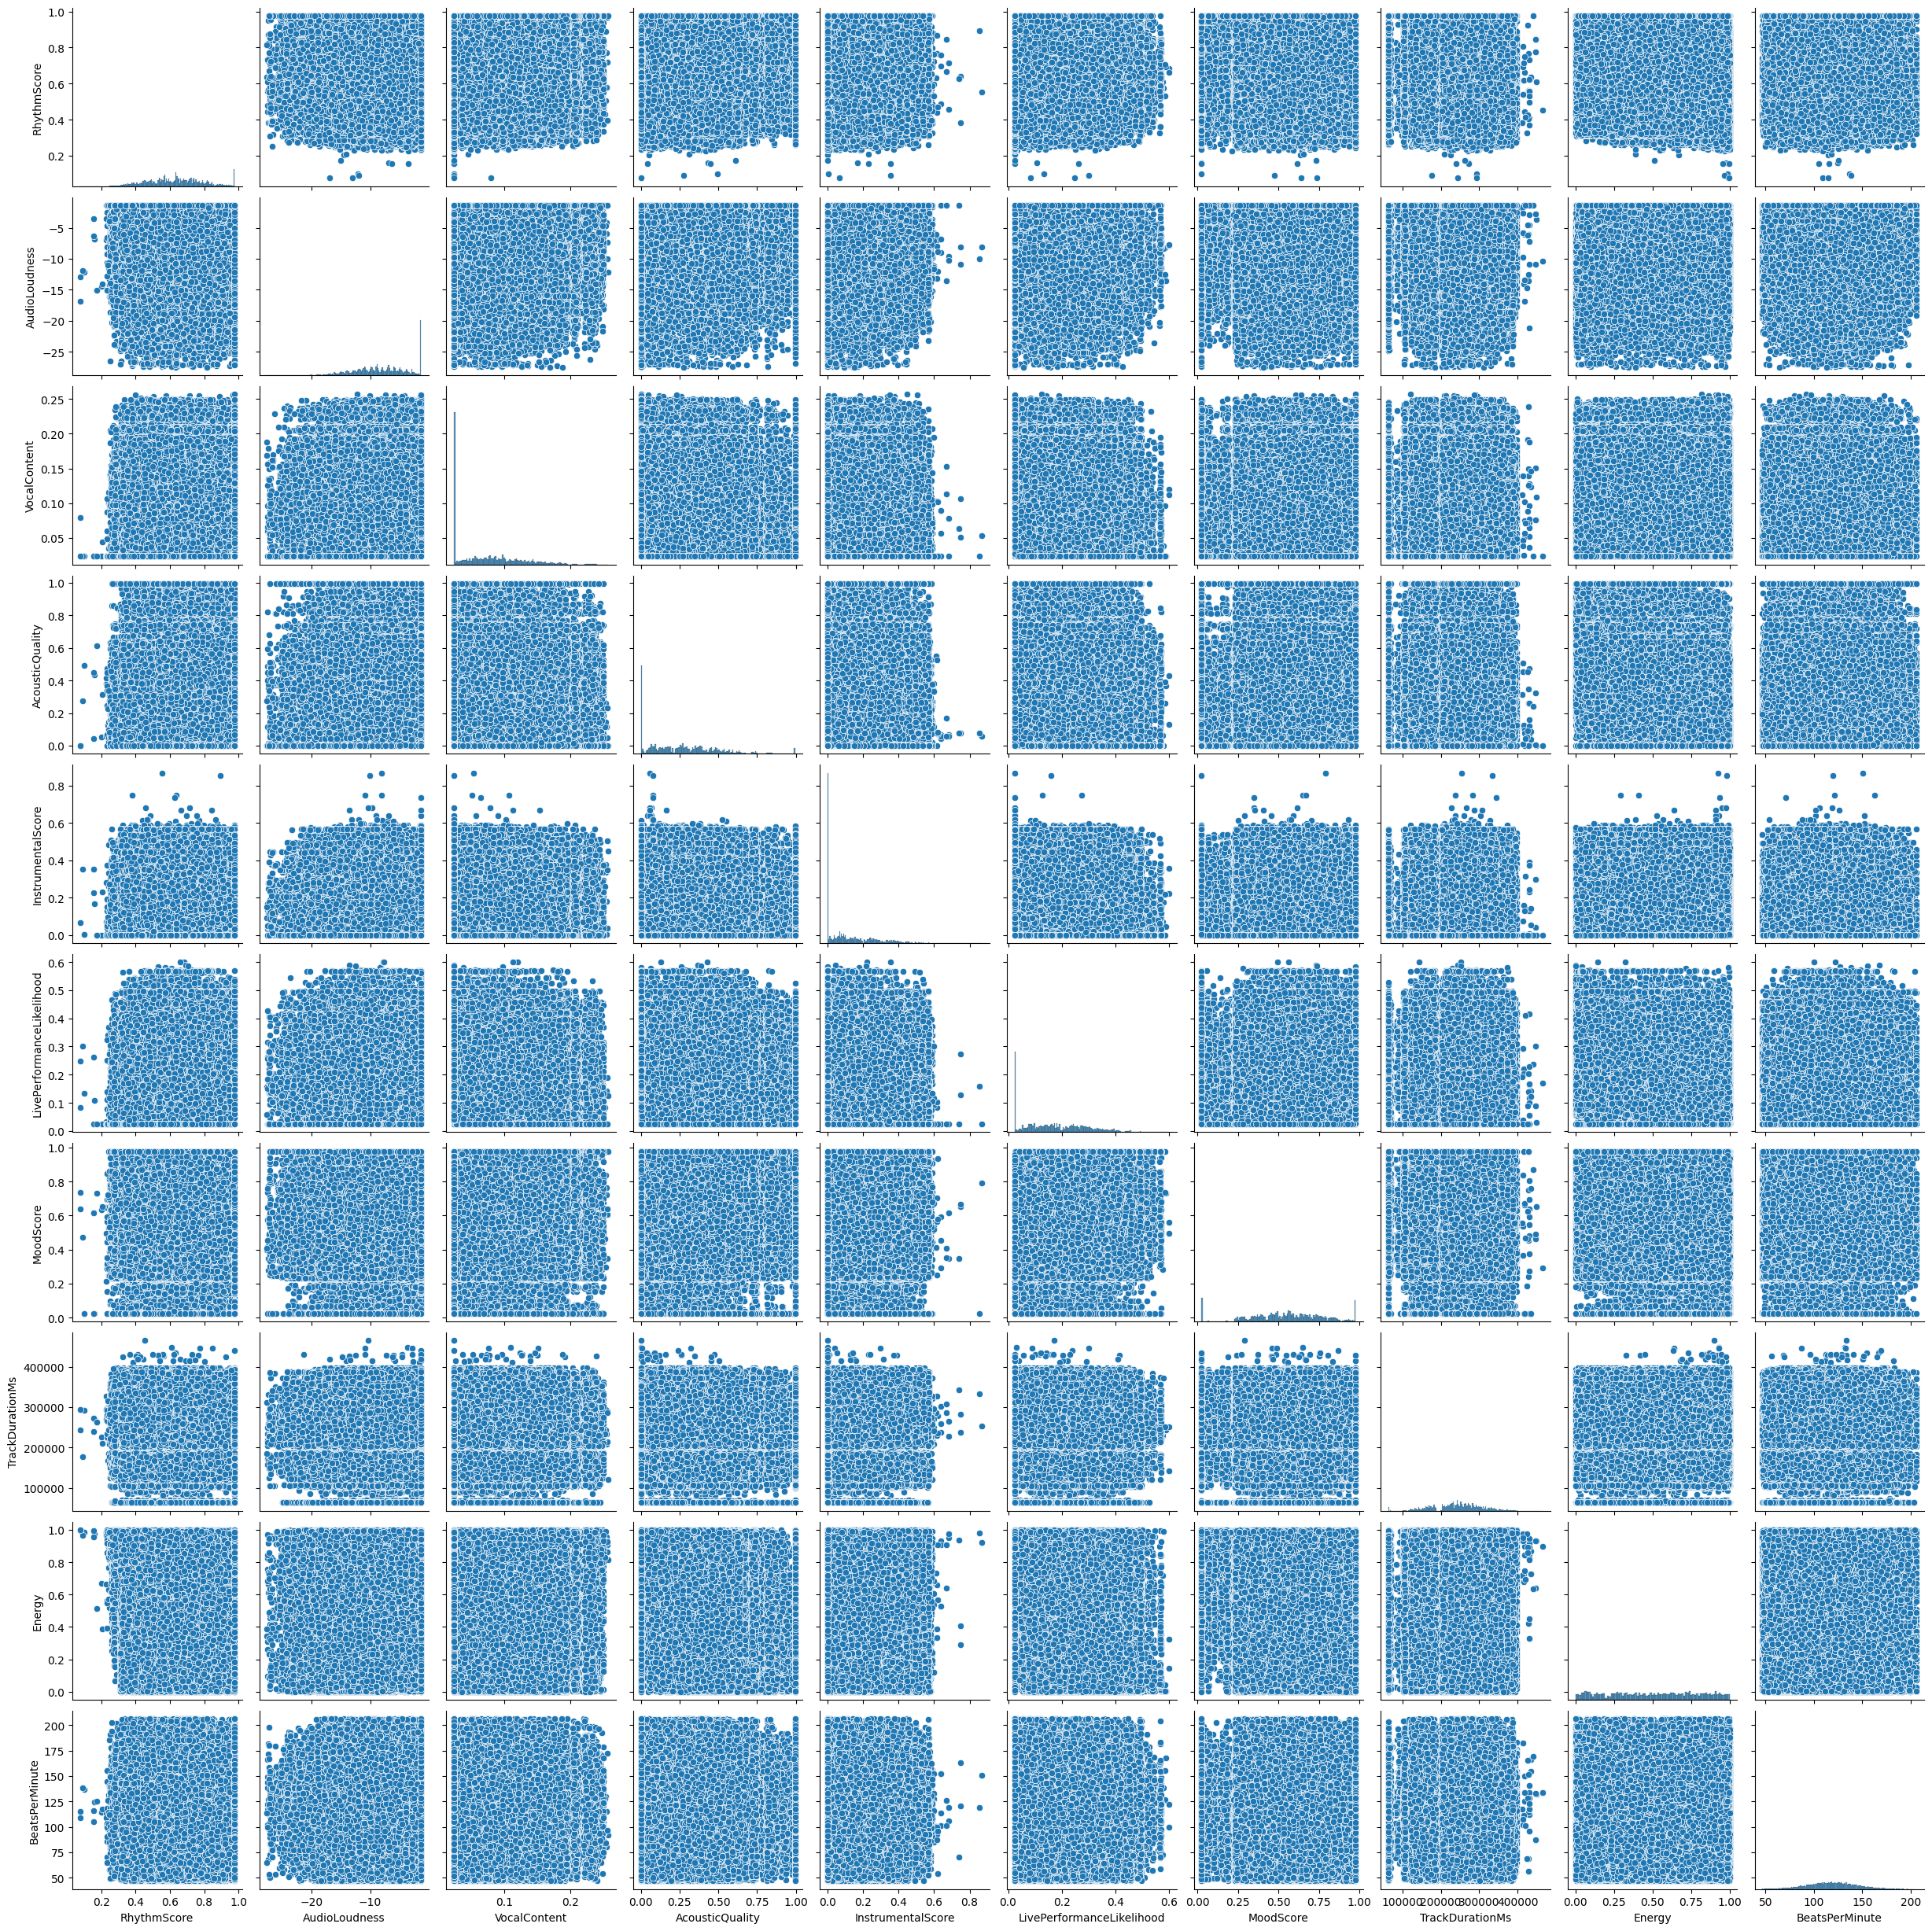

<Figure size 800x800 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df1)
plt.figure(figsize=(8, 8))
plt.show()

In [ ]:
df1.skew()

RhythmScore                  0.168155
AudioLoudness               -0.308514
VocalContent                 0.789112
AcousticQuality              0.785966
InstrumentalScore            1.036285
LivePerformanceLikelihood    0.393322
MoodScore                   -0.268820
TrackDurationMs             -0.190483
Energy                      -0.030344
BeatsPerMinute               0.071550
dtype: float64

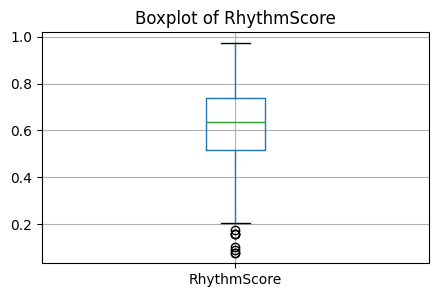

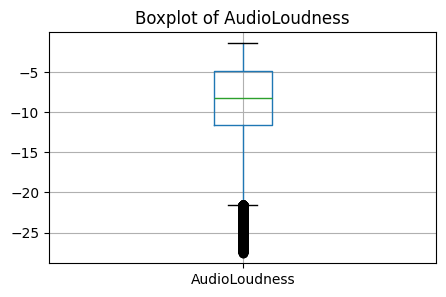

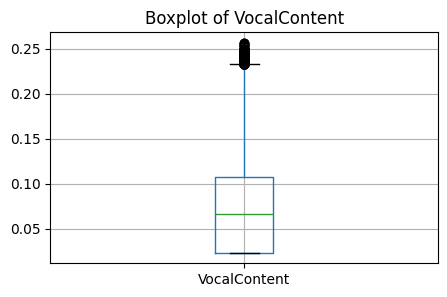

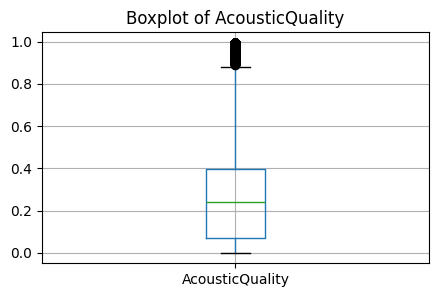

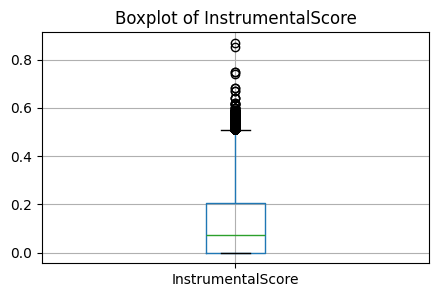

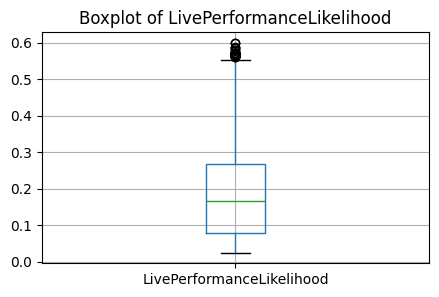

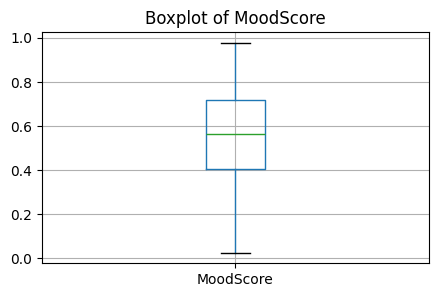

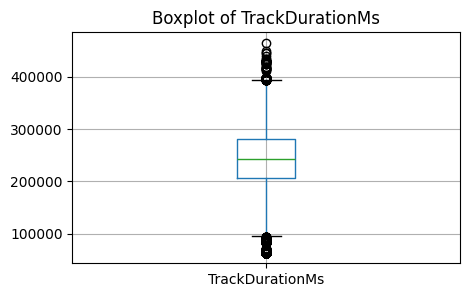

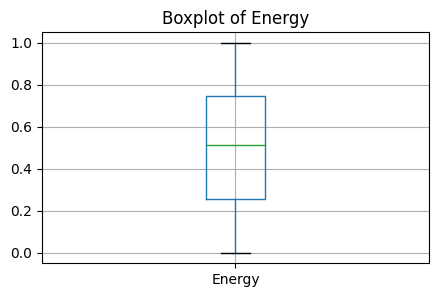

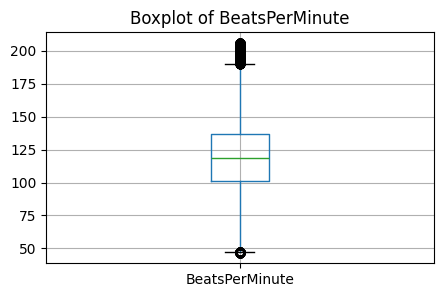

In [ ]:
import matplotlib.pyplot as plt
features_to_plot = (['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality','InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy', 'BeatsPerMinute'])
for feature in features_to_plot:
  plt.figure(figsize=(5, 3))
  df1.boxplot(feature, showfliers=True)   # showfliers=True to display outliers
  plt.title(f"Boxplot of {feature}")
  plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Numeric columns to transform
numeric_cols = (['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality','InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy', 'BeatsPerMinute'])


# Function to compute Gaussian bounds (mean ± k*std)
def get_gaussian_bounds(series, k=2.5):
    mean = series.mean()
    std = series.std()
    lower = mean - k * std
    upper = mean + k * std
    return lower, upper

# Apply Gaussian Winsorization
def winsorize_gaussian(df, columns, k=2.5):
    df_winsor = df.copy()
    for col in columns:
        lower, upper = get_gaussian_bounds(df_winsor[col], k)
        df_winsor[col] = np.where(df_winsor[col] < lower, lower, df_winsor[col])
        df_winsor[col] = np.where(df_winsor[col] > upper, upper, df_winsor[col])
    return df_winsor

# Example usage
# load your data
df1_win = winsorize_gaussian(df1, numeric_cols, k=2.5)  # Gaussian Winsorization

df1_win.head()


RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0     0.603610      -7.636942      0.023500         0.000005   
1     0.639451     -16.267598      0.071520         0.444929   
2     0.514538     -15.953575      0.110715         0.173699   
3     0.734463      -1.357000      0.052965         0.001651   
4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.447302                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

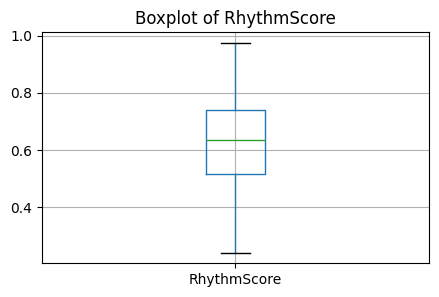

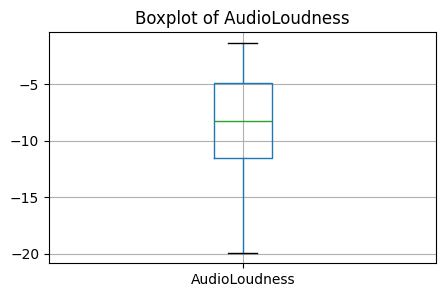

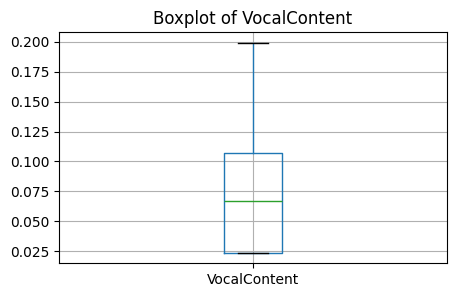

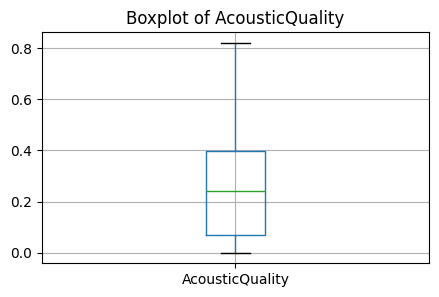

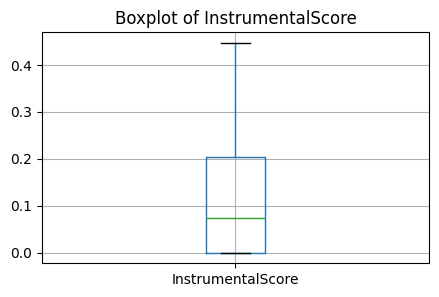

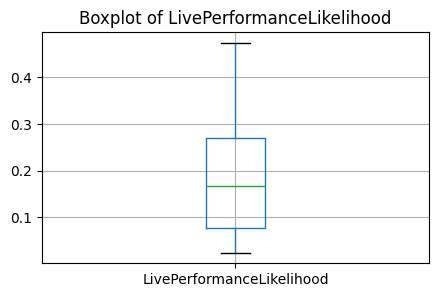

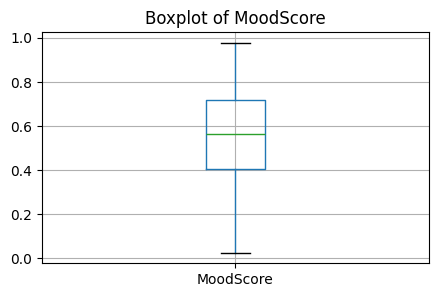

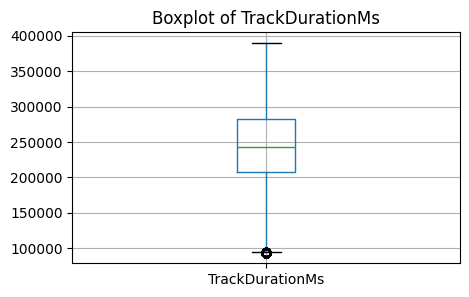

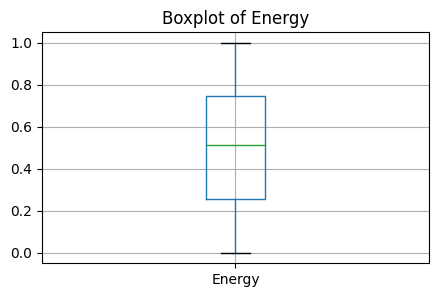

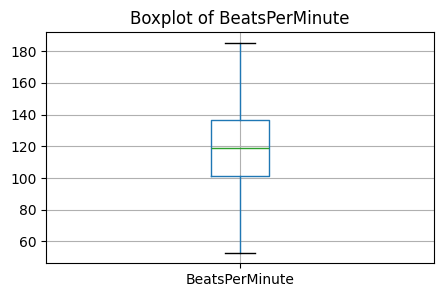

In [ ]:
import matplotlib.pyplot as plt
features_to_plot = (['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality','InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy', 'BeatsPerMinute'])
for feature in features_to_plot:
  plt.figure(figsize=(5, 3))
  df1_win.boxplot(feature, showfliers=True)   # showfliers=True to display outliers
  plt.title(f"Boxplot of {feature}")
  plt.show()

In [ ]:
df1_win.skew()

RhythmScore                  0.168469
AudioLoudness               -0.247094
VocalContent                 0.703537
AcousticQuality              0.617114
InstrumentalScore            0.951271
LivePerformanceLikelihood    0.376021
MoodScore                   -0.268820
TrackDurationMs             -0.120891
Energy                      -0.030344
BeatsPerMinute               0.044428
dtype: float64

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

# Select the columns and transform
cols_to_transform =  (['VocalContent', 'AcousticQuality','InstrumentalScore'])

df1_win[cols_to_transform] = pt.fit_transform(df1_win[cols_to_transform])

df1_win.skew()

RhythmScore                  0.168469
AudioLoudness               -0.247094
VocalContent                 0.171952
AcousticQuality              0.068517
InstrumentalScore            0.276767
LivePerformanceLikelihood    0.376021
MoodScore                   -0.268820
TrackDurationMs             -0.120891
Energy                      -0.030344
BeatsPerMinute               0.044428
dtype: float64

In [ ]:
column_plot = (['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality','InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy', 'BeatsPerMinute'])

# Loop through each column to calculate outliers
for col in column_plot:
    Q1 = df1_win[col].quantile(0.25)
    Q3 = df1_win[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = df1_win[(df1_win[col] < lower_bound) | (df1_win[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


RhythmScore: 0 outliers
AudioLoudness: 0 outliers
VocalContent: 0 outliers
AcousticQuality: 0 outliers
InstrumentalScore: 0 outliers
LivePerformanceLikelihood: 0 outliers
MoodScore: 0 outliers
TrackDurationMs: 0 outliers
Energy: 0 outliers
BeatsPerMinute: 0 outliers


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# -----------------------------
# 1. Prepare Features & Target
# -----------------------------
X_train = df1_win.drop(columns=["BeatsPerMinute"])
y_train = df1_win["BeatsPerMinute"]

# -----------------------------
# 2. Scaling for Linear Regression
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit + transform on train

# -----------------------------
# 3. Train Models
# -----------------------------
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print("✅ Linear Regression trained.")

# Random Forest (optimized for speed)
rf = RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
print("✅ Random Forest trained.")


✅ Linear Regression trained.
✅ Random Forest trained.


In [ ]:
# -----------------------------
# 1. Prepare Test Features
# -----------------------------
X_test = df1_test.drop(columns=["id"])  # drop id, keep only features

# -----------------------------
# 2. Scale Linear Regression Test Features
# -----------------------------
X_test_scaled = scaler.transform(X_test)  # use the scaler fitted on train

# -----------------------------
# 3. Predict on Test Dataset
# -----------------------------
# Linear Regression predictions
test_pred_lin = lin_reg.predict(X_test_scaled)

# Random Forest predictions
test_pred_rf = rf.predict(X_test)

# -----------------------------
# 4. Create Submission DataFrames
# -----------------------------
submission_lin = pd.DataFrame({
    "id": df1_test["id"],
    "BeatsPerMinute": test_pred_lin
})

submission_rf = pd.DataFrame({
    "id": df1_test["id"],
    "BeatsPerMinute": test_pred_rf
})

# -----------------------------
# 5. Save to CSV
# -----------------------------
submission_lin.to_csv("submission_linear.csv", index=False)
submission_rf.to_csv("submission_rf.csv", index=False)

print("✅ Submission files created:")
print("- submission_linear.csv")
print("- submission_rf.csv")


✅ Submission files created:
- submission_linear.csv
- submission_rf.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df1_win.drop(columns=["BeatsPerMinute"])
y = df1_win["BeatsPerMinute"]

# 20% validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Train and Predict with Linear Regression
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_val_pred_lin = lin_reg.predict(X_val_scaled)

# Evaluate Linear Regression
rmse_lin = np.sqrt(mean_squared_error(y_val, y_val_pred_lin))
r2_lin = r2_score(y_val, y_val_pred_lin)
print(f"Linear Regression - RMSE: {rmse_lin:.4f}, R2: {r2_lin:.4f}")

# -----------------------------
# Train and Predict with Random Forest
# -----------------------------
rf = RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_val_pred_rf = rf.predict(X_val)

# Evaluate Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
r2_rf = r2_score(y_val, y_val_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

Linear Regression - RMSE: 26.2927, R2: 0.0001
Random Forest - RMSE: 26.2971, R2: -0.0002
